In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib
import json
font = {'size'   : 12}
matplotlib.rc('font', **font)
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout, TimeDistributed, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/10_nodes_new')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/10_nodes_new/data/10_nodes_LU.csv')
df.head()

Mounted at /content/gdrive


,"X(1, 2)","X(1, 5)","X(1, 8)","X(2, 3)","X(3, 4)","X(3, 8)","X(3, 9)","X(4, 10)","X(5, 6)","X(6, 7)",...,"Y4(3, 4)","Y4(3, 8)","Y4(3, 9)","Y4(4, 10)","Y4(5, 6)","Y4(6, 7)","Y4(6, 8)","Y4(6, 9)","Y4(7, 10)","Y4(9, 10)"
0,0.6,0.9,0.8,0.5,0.4,0.6,0.2,0.8,0.0,0.7,...,1,0,0,1,0,0,0,0,0,0
1,0.8,0.8,0.6,0.5,1.0,0.3,0.7,0.3,0.4,0.0,...,0,0,0,0,1,0,0,1,0,1
2,0.7,0.1,0.7,0.1,1.0,0.0,1.0,0.4,0.6,0.1,...,0,1,0,0,0,0,1,1,0,1
3,0.3,0.2,0.0,0.9,0.0,0.4,0.4,0.1,0.0,0.3,...,0,0,0,0,0,0,1,1,0,1
4,0.1,0.4,1.0,0.9,0.5,0.6,0.2,0.9,1.0,1.0,...,0,1,1,0,0,0,0,0,0,1


In [2]:
with open('gdrive/My Drive/Colab Notebooks/10_nodes_new/analysis/ABC_BFA_FA/ABC_BFA_FA.json', 'r') as f:
    data = json.load(f)
for key in data:
    data[key] = np.array(data[key])
number_runs = 30
x = np.arange(number_runs) + 1

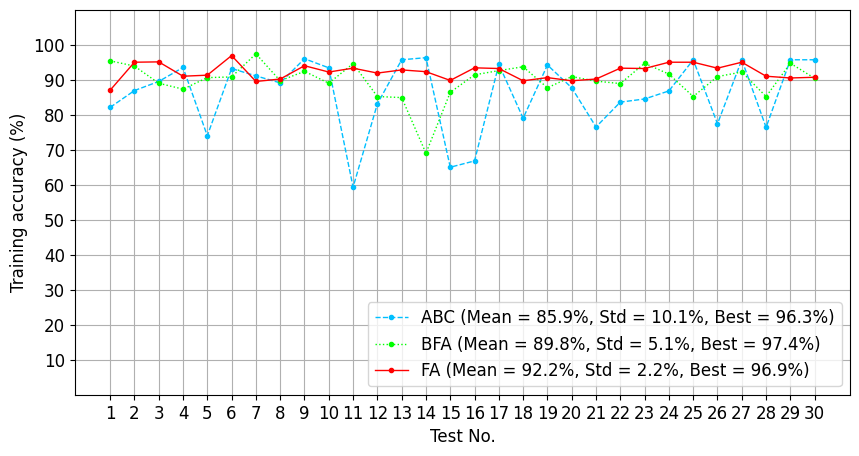

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ["train_ABC", "train_BFA", "train_FA"]
statistics = {metric: {
    'mean': round(np.mean(data[metric]), 1),
    'std': round(np.std(data[metric]), 1),
    'min': round(np.min(data[metric]), 1),
    'max': round(np.max(data[metric]), 1)
} for metric in metrics}

xticks = range(1, number_runs + 1)
ax.set_xticks(xticks, minor=False)
yticks = (np.arange(10) + 1) * 10
ax.set_yticks(yticks, minor=False)
plt.ylim(0, 110)

# Plot each metric with corresponding label and styles
colors = ['deepskyblue', 'lime', 'red']
linestyles = ['dashed', 'dotted', 'solid']
labels = ["ABC", "BFA", "FA"]

for i, metric in enumerate(metrics):
    stats = statistics[metric]
    plt.plot(
        x, data[metric],
        label=f"{labels[i]} (Mean = {stats['mean']}%, Std = {stats['std']}%, Best = {stats['max']}%)",
        linewidth=1, color=colors[i], linestyle=linestyles[i], marker='o', markersize=3
    )

plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Test No.")
plt.ylabel("Training accuracy (%)")
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/10_nodes_new/analysis/ABC_BFA_FA/Training_accuracy.png", dpi=200, bbox_inches='tight')
plt.show()

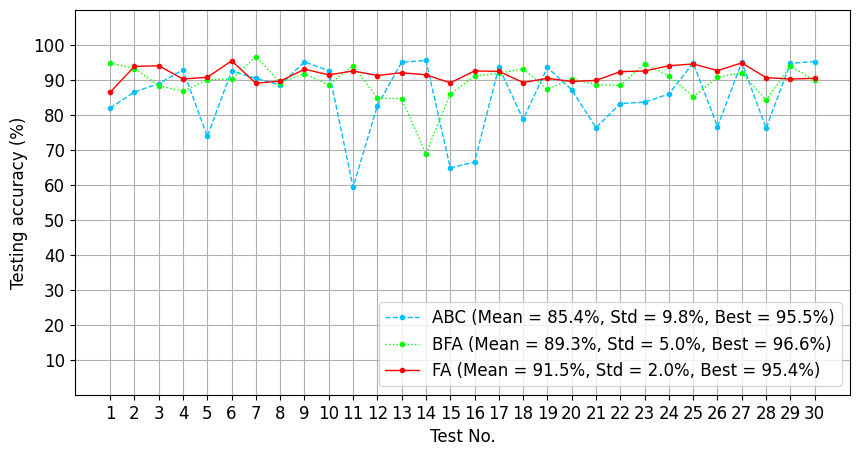

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ["test_ABC", "test_BFA", "test_FA"]
statistics = {metric: {
    'mean': round(np.mean(data[metric]), 1),
    'std': round(np.std(data[metric]), 1),
    'min': round(np.min(data[metric]), 1),
    'max': round(np.max(data[metric]), 1)
} for metric in metrics}

xticks = range(1, number_runs + 1)
ax.set_xticks(xticks, minor=False)
yticks = (np.arange(10) + 1) * 10
ax.set_yticks(yticks, minor=False)
plt.ylim(0, 110)

# Plot each metric with corresponding label and styles
colors = ['deepskyblue', 'lime', 'red']
linestyles = ['dashed', 'dotted', 'solid']
labels = ["ABC", "BFA", "FA"]

for i, metric in enumerate(metrics):
    stats = statistics[metric]
    plt.plot(
        x, data[metric],
        label=f"{labels[i]} (Mean = {stats['mean']}%, Std = {stats['std']}%, Best = {stats['max']}%)",
        linewidth=1, color=colors[i], linestyle=linestyles[i], marker='o', markersize=3
    )

plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Test No.")
plt.ylabel("Testing accuracy (%)")
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/10_nodes_new/analysis/ABC_BFA_FA/Testing_accuracy.png", dpi=200, bbox_inches='tight')
plt.show()

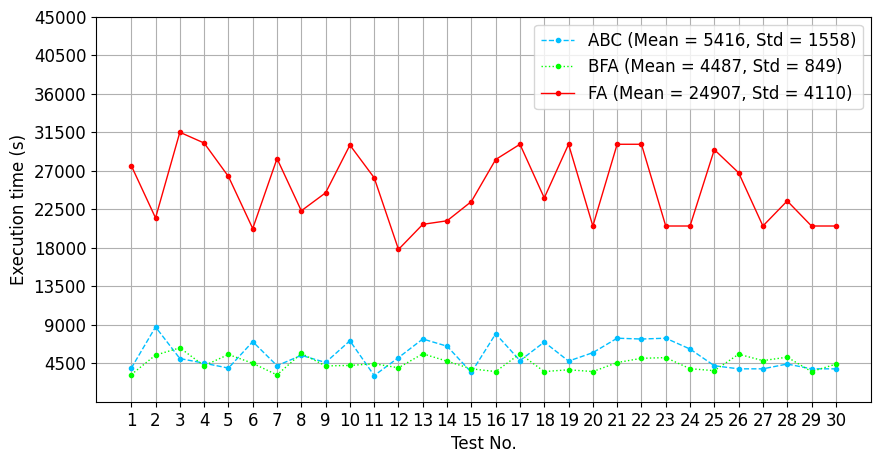

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ["time_ABC", "time_BFA", "time_FA"]
statistics = {metric: {
    'mean': round(np.mean(data[metric])),
    'std': round(np.std(data[metric])),
    'min': round(np.min(data[metric])),
    'max': round(np.max(data[metric]))
} for metric in metrics}

xticks = range(1, number_runs + 1)
ax.set_xticks(xticks, minor=False)
yticks = (np.arange(10) + 1) *4500
ax.set_yticks(yticks, minor=False)
plt.ylim(0, 45000)

# Plot each metric with corresponding label and styles
colors = ['deepskyblue', 'lime', 'red']
linestyles = ['dashed', 'dotted', 'solid']
labels = ["ABC", "BFA", "FA"]

for i, metric in enumerate(metrics):
    stats = statistics[metric]
    plt.plot(
        x, data[metric],
        label=f"{labels[i]} (Mean = {stats['mean']}, Std = {stats['std']})",
        linewidth=1, color=colors[i], linestyle=linestyles[i], marker='o', markersize=3
    )

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("Test No.")
plt.ylabel("Execution time (s)")
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/10_nodes_new/analysis/ABC_BFA_FA/Time.png", dpi=200, bbox_inches='tight')
plt.show()